In [ ]:
 import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import numpy as np


In [ ]:
dataset = pd.read_csv("/content/sensor_db-readings.csv")

In [ ]:
dataset.head()

,id;azimuth;pitch;roll
0,1;0.0;9.776321411132812;0.812345027923584
1,2;0.0;9.776321411132812;0.812345027923584
2,3;0.0;9.776321411132812;0.812345027923584
3,4;0.0;9.776321411132812;0.812345027923584
4,5;0.0;9.776321411132812;0.812345027923584


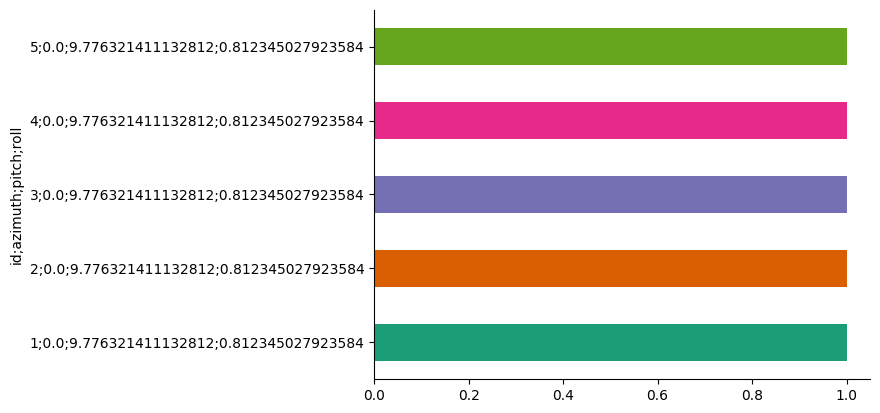

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('id;azimuth;pitch;roll').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
data = pd.read_csv("/content/sensor_db-readings.csv")

data_split = data['id;azimuth;pitch;roll'].str.split(';', expand=True)
data_split.columns = ['id', 'azimuth', 'pitch', 'roll']
data_split['azimuth'] = pd.to_numeric(data_split['azimuth'])
data_split['pitch'] = pd.to_numeric(data_split['pitch'])
data_split['roll'] = pd.to_numeric(data_split['roll'])
data_split.index = pd.date_range(start='2023-01-01', periods=len(data_split), freq='5S')

In [ ]:
def resample_and_forecast(data, sample_interval, forecast_steps, features):
    # Loop through each feature to model and plot
    for feature in features:
        # Resample the data at the specified interval
        resampled_data = data[feature].resample(sample_interval).mean()

        # Fit the ARIMA model
        model = ARIMA(resampled_data.dropna(), order=(1, 1, 1))  # Adjust parameters as needed
        fitted_model = model.fit()

        # Forecast
        forecast = fitted_model.get_forecast(steps=forecast_steps)
        forecast_values = forecast.predicted_mean

        # Plotting
        plt.figure(figsize=(10, 6))
        plt.plot(resampled_data.index[-100:], resampled_data[-100:], label=f'Actual {feature}')
        forecast_index = pd.date_range(start=resampled_data.index[-1] + pd.Timedelta(seconds=int(sample_interval[:-1])*forecast_steps),
                                       periods=forecast_steps, freq=sample_interval)
        plt.plot(forecast_index, forecast_values, label=f'Forecasted {feature}', color='red', marker='o')
        plt.title(f'Actual vs Forecasted {feature} (Interval: {sample_interval})')
        plt.xlabel('Time')
        plt.ylabel(feature)
        plt.legend()
        plt.grid(True)
        plt.show()

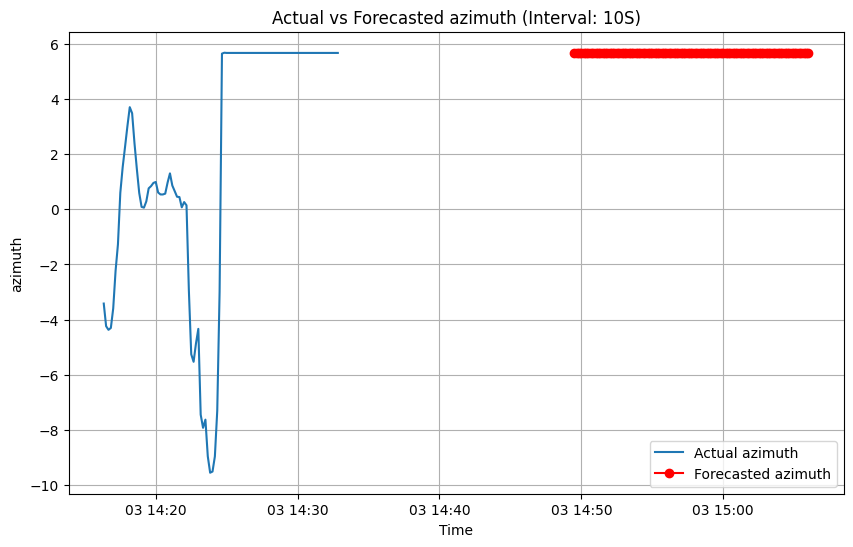

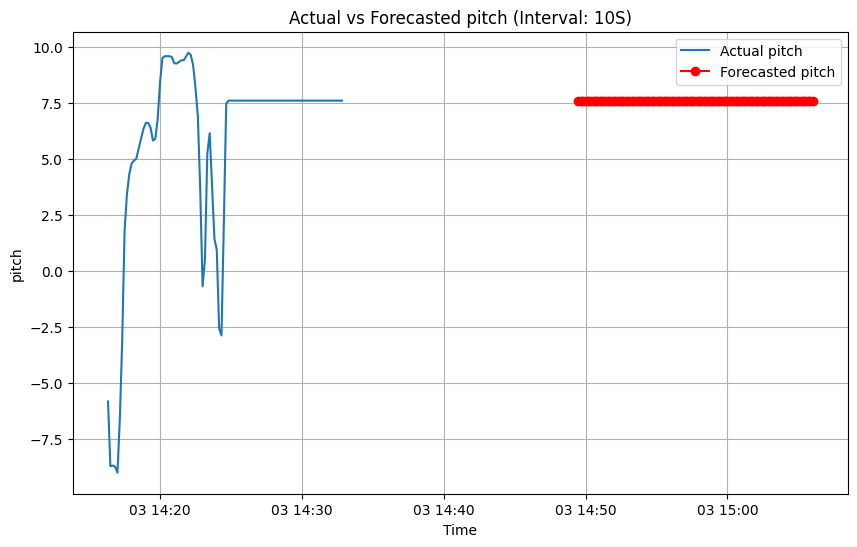

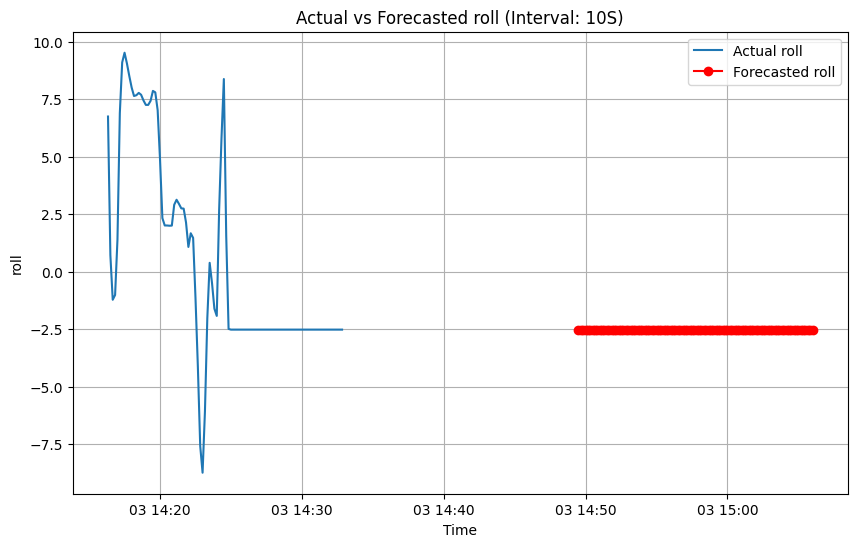

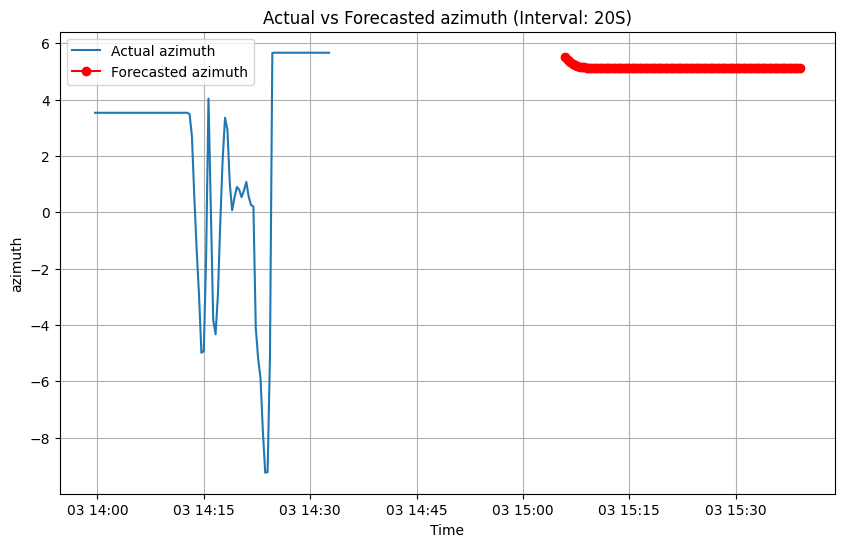

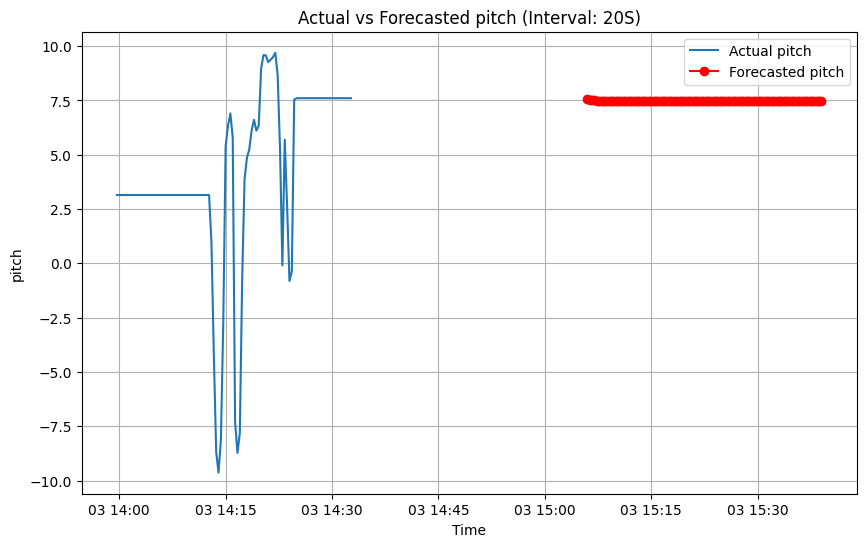

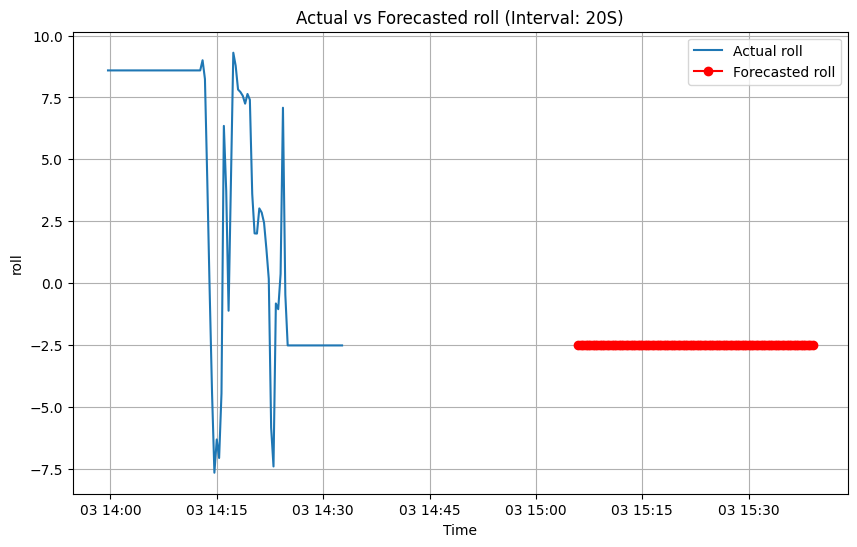

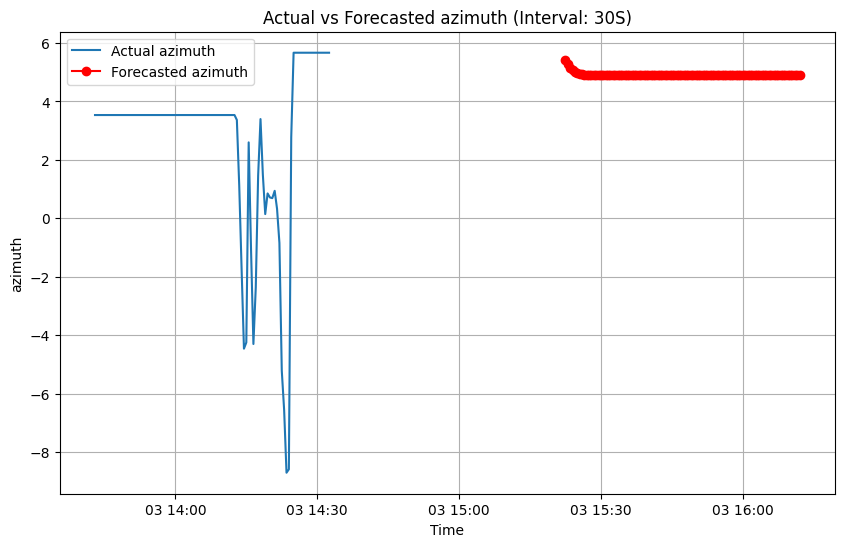

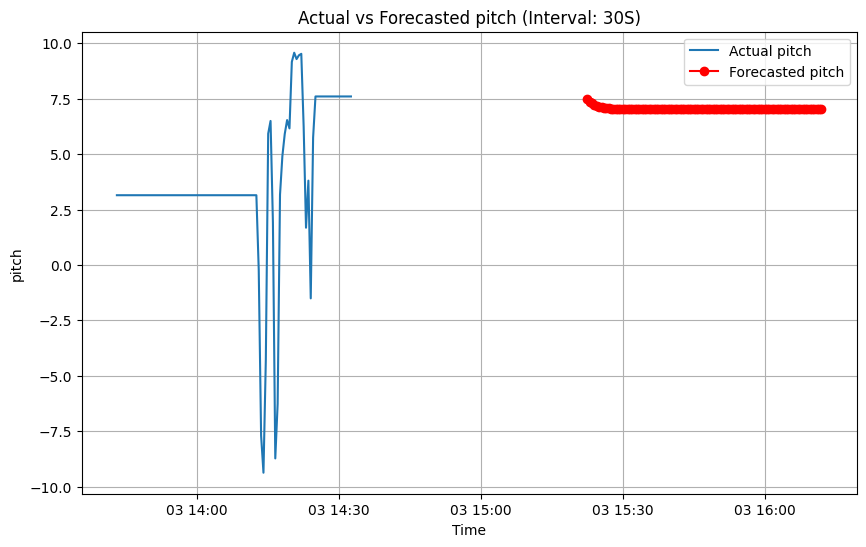

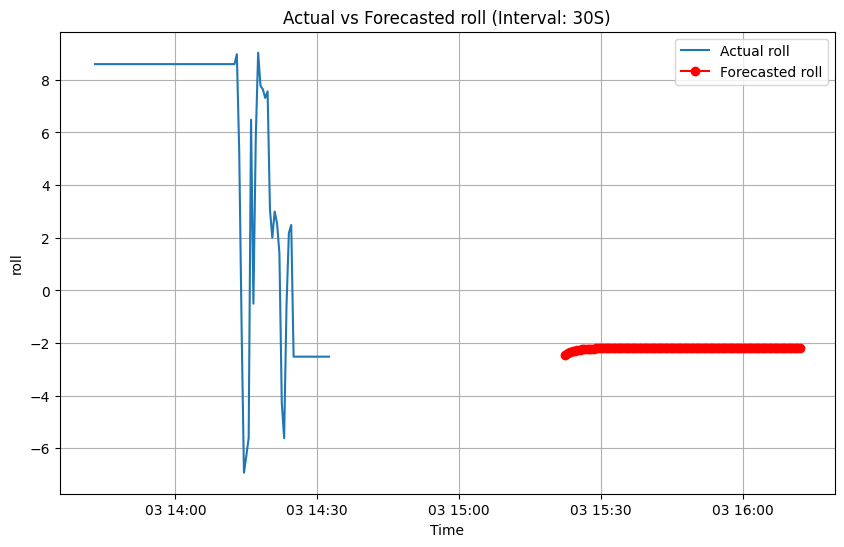

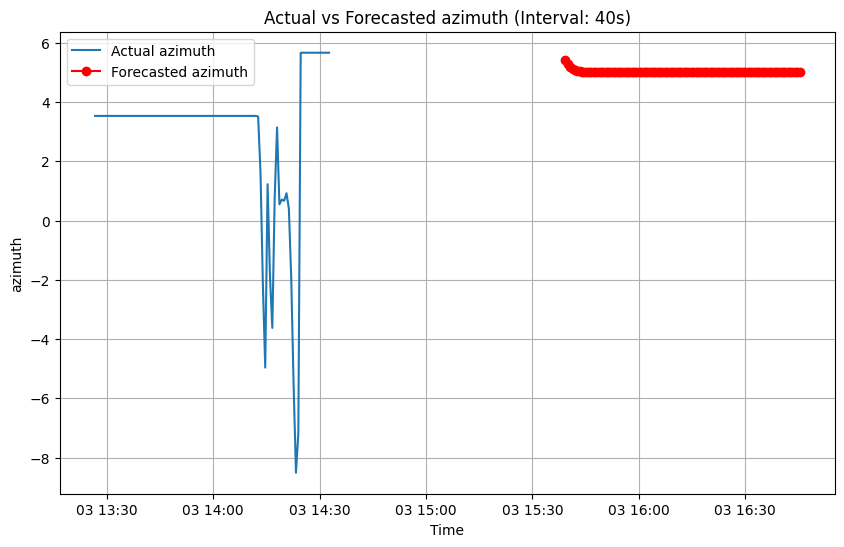

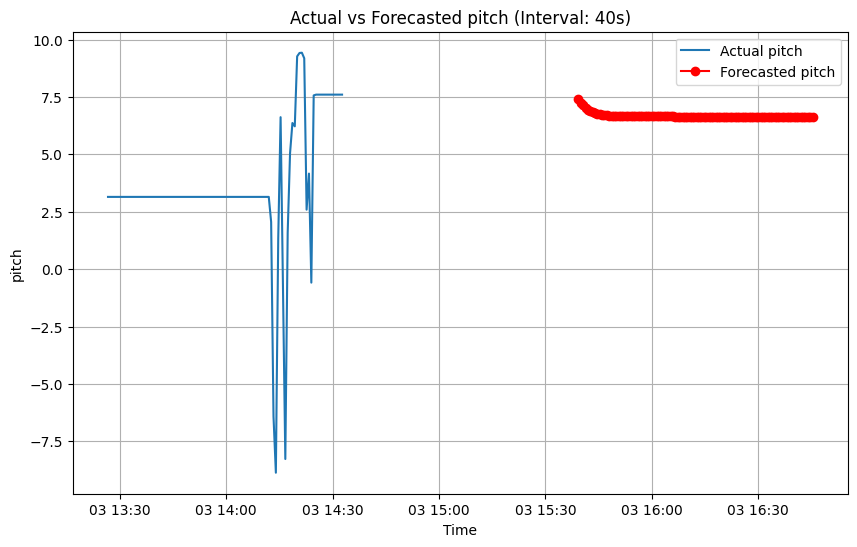

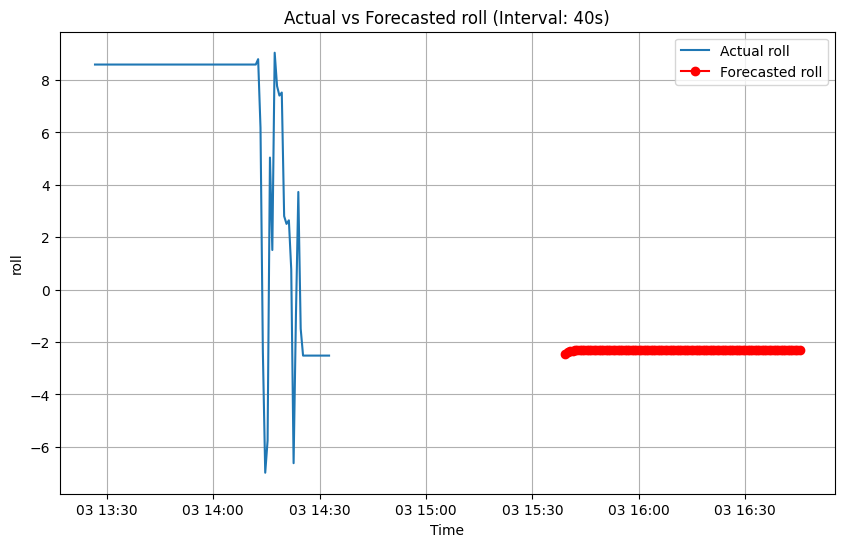

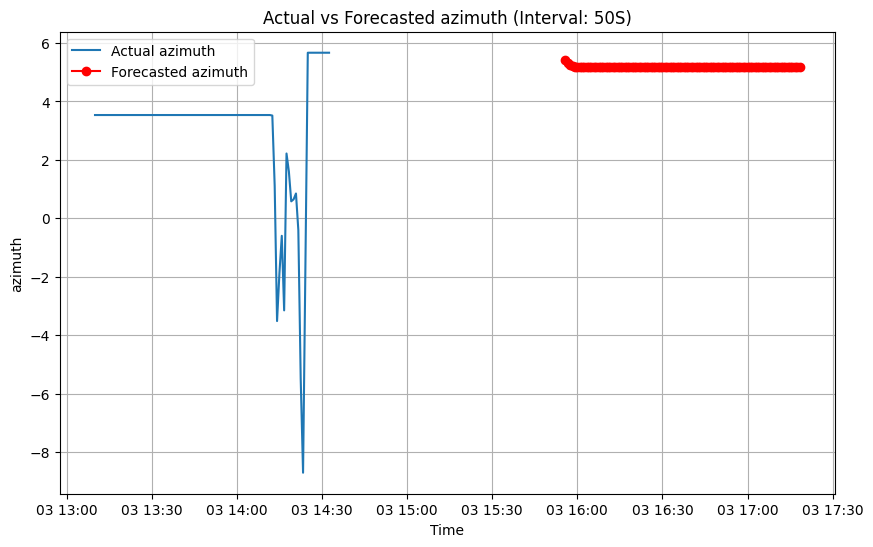

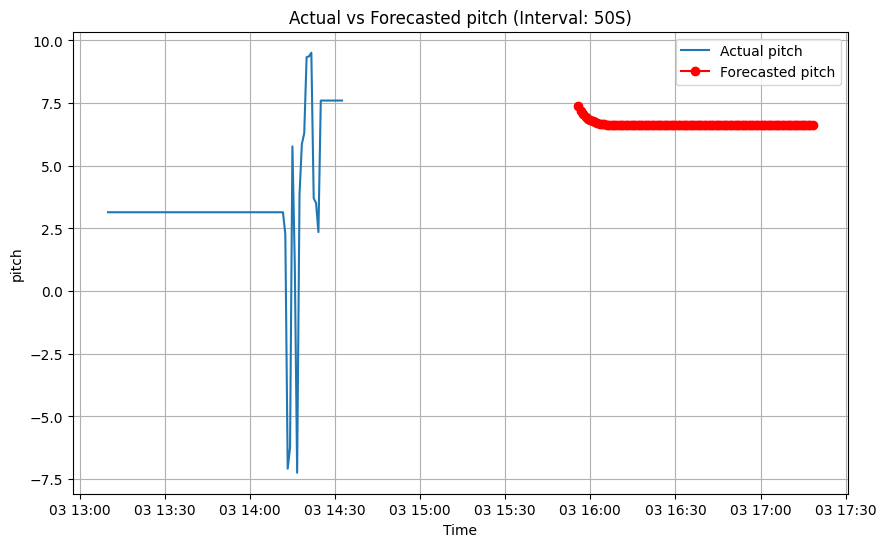

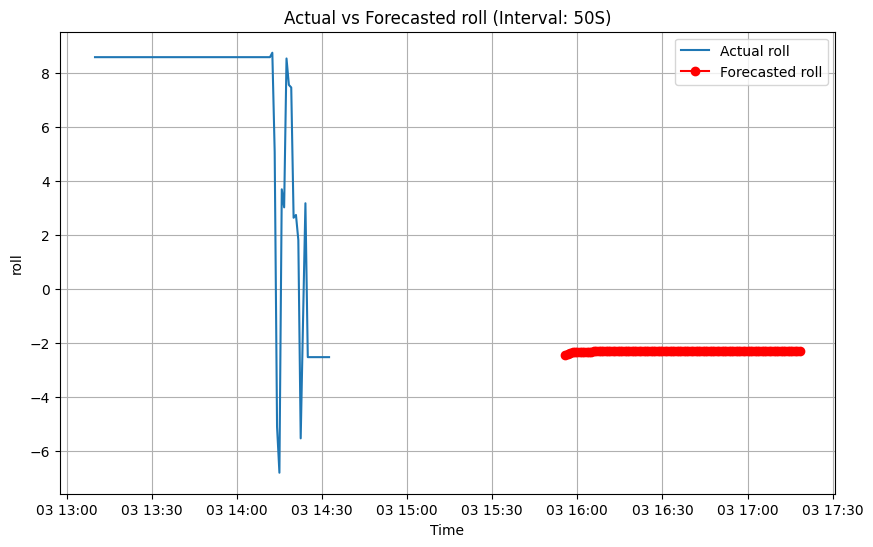

In [ ]:
resample_intervals = ['10S', '20S', '30S','40s','50S']
features = ['azimuth', 'pitch', 'roll']
for interval in resample_intervals:
    resample_and_forecast(data_split, interval, 100, features)